In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch.univariate import GARCH, ARX
from arch import arch_model
import statsmodels.tsa.arima_model
import pmdarima as pmd

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


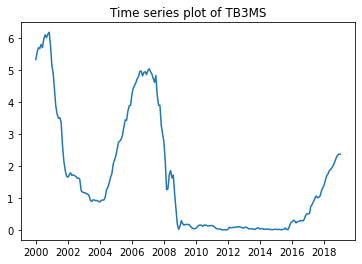

In [2]:
data = pd.read_csv('TB3MS.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.set_index('DATE')
data = data['2000-01-01':'2019-01-01']
plt.plot(data)
plt.title('Time series plot of TB3MS')
plt.show()

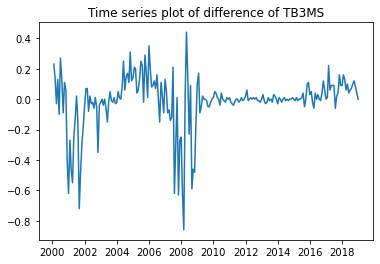

In [6]:
data_diff = data.diff().dropna()
data_diff2 = data.diff().dropna().diff().dropna()
plt.plot(data_diff)
plt.title('Time series plot of difference of TB3MS')
plt.show()

In [168]:
adfuller(data)

(-3.791852835948498,
 0.002991779748245096,
 8,
 220,
 {'1%': -3.4604283689894815,
  '5%': -2.874768966942149,
  '10%': -2.57382076446281},
 -253.7399082282077)

In [167]:
data

,TB3MS
DATE,
2000-01-01,5.32
2000-02-01,5.55
2000-03-01,5.69
2000-04-01,5.66
2000-05-01,5.79
...,...
2018-09-01,2.13
2018-10-01,2.25
2018-11-01,2.33


In [166]:
kpss(data)

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.6844227194982032,
 0.014961570954708797,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

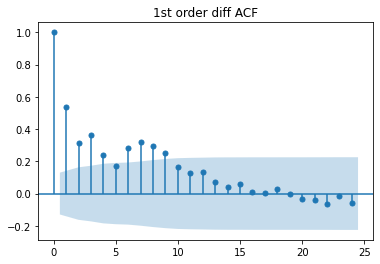

In [169]:
plot_acf(data_diff)
plt.title('1st order diff ACF')
plt.show()

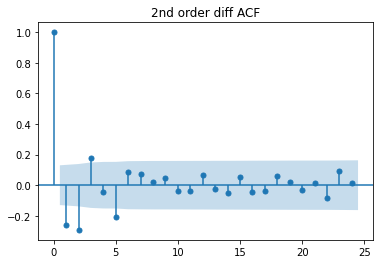

In [170]:
plot_acf(data_diff2)
plt.title('2nd order diff ACF')
plt.show()

In [152]:
def searchARMA(data, max_p, max_q,max_d):
    max_p += 1
    max_q += 1
    aic = np.zeros((max_p,max_q,max_d))
    bic = np.zeros((max_p,max_q,max_d))
    for i in range(max_p):
        for j in range(max_q):
            for d in range(max_d):
                d_ = d+ 1
                model = ARIMA(data,order = (i,d_,j)) 
                res = model.fit()
                aic[i,j,d] = res.aic
                bic[i,j,d] = res.bic
                print('p:',i,' q:', j,'d:',d_,' aic:', aic[i,j,d], ' bic:', bic[i,j,d])
    return aic,bic


In [153]:
aic_result,bic_result=searchARMA(data,3 ,3,2)
print('min_aic: ',np.argmin(aic_result))
print('min_bic: ',np.argmin(bic_result))
print('\n')

p: 0  q: 0 d: 1  aic: -143.19938132065408  bic: -139.77003569169963
p: 0  q: 0 d: 2  aic: -161.2797930232824  bic: -157.854843005801
p: 0  q: 1 d: 1  aic: -210.8409548683542  bic: -203.98226361044533
p: 0  q: 1 d: 2  aic: -205.1384358251943  bic: -198.2885357902315
p: 0  q: 2 d: 1  aic: -211.29084393543414  bic: -201.00280704857082
p: 0  q: 2 d: 2  aic: -223.33513959943429  bic: -213.06028954699008
p: 0  q: 3 d: 1  aic: -221.07649161585985  bic: -207.35910910004208
p: 0  q: 3 d: 2  aic: -223.04652388096244  bic: -209.34672381103684
p: 1  q: 0 d: 1  aic: -219.4116475330444  bic: -212.55295627513553
p: 1  q: 0 d: 2  aic: -174.84531930465602  bic: -167.9954192696932
p: 1  q: 1 d: 1  aic: -219.1159726917968  bic: -208.82793580493347
p: 1  q: 1 d: 2  aic: -217.04115039624807  bic: -206.76630034380386
p: 1  q: 2 d: 1  aic: -230.19490688763702  bic: -216.47752437181924
p: 1  q: 2 d: 2  aic: -223.23112677013543  bic: -209.53132670020983
p: 1  q: 3 d: 1  aic: -230.59674158401694  bic: -213.4500

In [155]:
aic_result.flatten()[24]

-231.13477036159506

In [3]:
model_op = ARIMA(data,order=(3,1,0))
result = model_op.fit()
result.summary()

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  TB3MS   No. Observations:                  229
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 119.567
Date:                Sun, 29 Nov 2020   AIC                           -231.135
Time:                        14:59:28   BIC                           -217.417
Sample:                    01-01-2000   HQIC                          -225.600
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5095      0.035     14.406      0.000       0.440       0.579
ar.L2         -0.0959      0.043     -2.248      0.025      -0.180      -0.012
ar.L3          0.2552      0.043      5.945      0.000       0.171       0.339
sigma2         0.0205      0.001     23.312      0.000       0.019       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               618.16
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -1.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

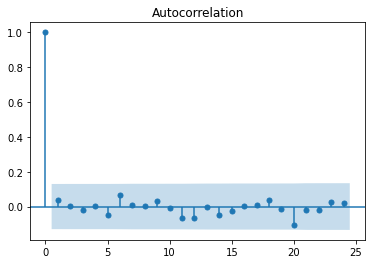

In [4]:
residual_arma = result.resid
plot_acf(residual_arma)
plt.show()

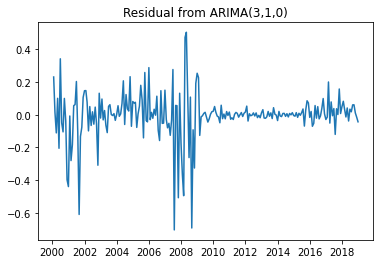

In [171]:
plt.plot(residual_arma[1:])
plt.title('Residual from ARIMA(3,1,0)')
plt.show()

In [25]:
arx = ARX(data_diff, lags=3,rescale = False)
arx.volatility = GARCH(2,0,2)
res = arx.fit(update_freq=0)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -235.3084209085882
            Iterations: 16
            Function evaluations: 161
            Gradient evaluations: 12


In [26]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                  TB3MS   R-squared:                       0.326
Mean Model:                        AR   Adj. R-squared:                  0.317
Vol Model:                      GARCH   Log-Likelihood:                235.308
Distribution:                  Normal   AIC:                          -452.617
Method:            Maximum Likelihood   BIC:                          -421.872
                                        No. Observations:                  225
Date:                Sun, Nov 29 2020   Df Residuals:                      216
Time:                        15:06:22   Df Model:                            9
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      2.5890e-03  2.189e-03      1.183      0.237 [-1.702e-03,6.880e-03]
TB3MS[1]       0.5257      0.110      4.777  1.781e-06      [  0.310,  0.741]
TB3MS[2]      -0.0479      0.104     -0.462      0.644      [ -0.251,  0.155]
TB3MS[3]       0.2952      0.136      2.171  2.993e-02    [2.870e-02,  0.562]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2338e-04  1.493e-04      2.837  4.560e-03 [1.308e-04,7.159e-04]
alpha[1]       0.3087      0.145      2.130  3.316e-02   [2.467e-02,  0.593]
alpha[2]       0.0768      0.144      0.532      0.594     [ -0.206,  0.360]
beta[1]        0.2995      0.586      0.511      0.609     [ -0.849,  1.448]
beta[2]        0.2995      0.493      0.608      0.543     [ -0.667,  1.266]
============================================================================

Covariance estimator: robust
"""

In [47]:
import pmdarima
import arch

arima_model = pmdarima.auto_arima(data)
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\pmdarima\arima\_auto_solvers.py:207:

ValueError: Could not successfully fit ARIMA to input data. It is likely your data is non-stationary. Please induce stationarity or try a different range of model order params. If your data is seasonal, check the period (m) of the data.

In [32]:
model = ARIMA(data_diff,order=(3,0,1)).fit()

model.summary()

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  TB3MS   No. Observations:                  228
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 120.187
Date:                Sun, 29 Nov 2020   AIC                           -228.375
Time:                        15:30:29   BIC                           -207.799
Sample:                    02-01-2000   HQIC                          -220.073
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.036     -0.290      0.771      -0.082       0.061
ar.L1          0.2935      0.133      2.212      0.027       0.033       0.554
ar.L2          0.0133      0.083      0.160      0.873      -0.150       0.177
ar.L3          0.2642      0.044      6.008      0.000       0.178       0.350
ma.L1          0.2308      0.142      1.631      0.103      -0.047       0.508
sigma2         0.0204      0.001     19.573      0.000       0.018       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               605.58
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model1 = ARIMA(data_diff,order=(0,0,1)).fit()
model2 = ARIMA(model1.resid,order = (3,0,0)).fit()
model1.summary()

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred f

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  TB3MS   No. Observations:                  228
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 107.763
Date:                Sun, 29 Nov 2020   AIC                           -209.527
Time:                        15:31:55   BIC                           -199.239
Sample:                    02-01-2000   HQIC                          -205.376
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0127      0.020     -0.629      0.530      -0.052       0.027
ma.L1          0.5325      0.037     14.501      0.000       0.461       0.604
sigma2         0.0227      0.001     17.627      0.000       0.020       0.025
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):               666.97
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
np.mean(model.resid)

-0.0009557040739258116

In [60]:
arx = ARX(data_diff, lags=3,rescale = False) #this is eq. to AR(4) as per above
arx.volatility = GARCH(2,0,2)
res = arx.fit(update_freq=0)#, tol=0.000001
print(res.summary())
print(res.aic)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -235.3084209085882
            Iterations: 16
            Function evaluations: 161
            Gradient evaluations: 12
                           AR - GARCH Model Results                           
Dep. Variable:                  TB3MS   R-squared:                       0.326
Mean Model:                        AR   Adj. R-squared:                  0.317
Vol Model:                      GARCH   Log-Likelihood:                235.308
Distribution:                  Normal   AIC:                          -452.617
Method:            Maximum Likelihood   BIC:                          -421.872
                                        No. Observations:                  225
Date:                Sat, Nov 21 2020   Df Residuals:                      216
Time:                        22:58:55   Df Model:                            9
                                  Mean Model                                 


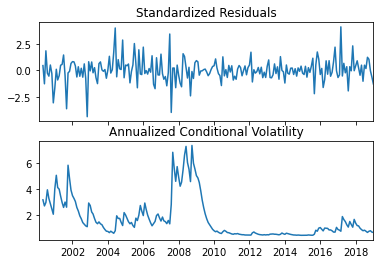

In [58]:
res.plot(annualize='D')
plt.show()

In [174]:
def searchGARCH(data, max_p, max_q,minus = 0):
    arx = ARX(data, lags=3,rescale = False) #this is eq. to AR(4) as per above
    max_p += 1
    max_q += 1
    aic = np.zeros((max_p,max_q))
    bic = np.zeros((max_p,max_q))
    for i in range(max_p):
        i_ = i+1
        for j in range(max_q):
            arx.volatility = GARCH(i_,0,j)
            res = arx.fit(update_freq=0)#, tol=0.000001
            aic[i,j] = res.aic -minus
            bic[i,j] = res.bic - minus
            print('p:',i_,' q:', j,' aic:', aic[i,j], ' bic:', bic[i,j])
    return aic,bic

In [175]:
aic_garch,bic_garch = searchGARCH(data_diff,2,3)
print('min_aic: ',np.argmin(aic_garch))
print('min_bic: ',np.argmin(bic_garch))
print('\n')

Optimization terminated successfully    (Exit mode 0)
            Current function value: -185.97637975464175
            Iterations: 23
            Function evaluations: 189
            Gradient evaluations: 23
p: 1  q: 0  aic: -359.9527595092835  bic: -339.456157096057
Optimization terminated successfully    (Exit mode 0)
            Current function value: -237.5096788680634
            Iterations: 19
            Function evaluations: 165
            Gradient evaluations: 15
p: 1  q: 1  aic: -461.0193577361268  bic: -437.10665492069586
Optimization terminated successfully    (Exit mode 0)
            Current function value: -234.10761016822877
            Iterations: 21
            Function evaluations: 203
            Gradient evaluations: 17
p: 1  q: 2  aic: -452.21522033645755  bic: -424.8864171188222
Optimization terminated successfully    (Exit mode 0)
            Current function value: -213.15369738239397
            Iterations: 16
            Function evaluations: 161
      

In [81]:
np.min(aic_garch)

-469.5003173172912

In [78]:
aic_garch

array([[-359.95275951, -461.01935774, -452.21522034, -408.30739476],
       [-404.24824418, -469.50031732, -452.61684182, -462.07200301],
       [-437.67712268, -464.17196288, -468.72242601, -404.31833756]])

In [77]:
np.argmin(bic_garch)

5

In [55]:
arx = ARX(data, lags=3,rescale = False)
arx.volatility = GARCH(1,0,1)
res = arx.fit(update_freq=0)
# print(res.summary())
res.resid

Optimization terminated successfully    (Exit mode 0)
            Current function value: -218.47055361941594
            Iterations: 12
            Function evaluations: 99
            Gradient evaluations: 8


DATE
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01   -0.133201
2000-05-01    0.123234
                ...   
2018-09-01    0.052352
2018-10-01    0.055647
2018-11-01    0.002619
2018-12-01   -0.018017
2019-01-01   -0.033937
Name: resid, Length: 229, dtype: float64

In [56]:
model1 = ARIMA(data,order=(3,0,0)).fit()
model2 = arch_model(model1.resid, vol='GARCH',p=1, q=1).fit()
model2.resid[1:]

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.05998. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disable

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15624466.955264658
Iteration:      2,   Func. Count:     17,   Neg. LLF: 530.1027824717906
Iteration:      3,   Func. Count:     24,   Neg. LLF: -213.62542115251154
Iteration:      4,   Func. Count:     29,   Neg. LLF: -160.98213472685427
Iteration:      5,   Func. Count:     38,   Neg. LLF: 109558.4109938976
Iteration:      6,   Func. Count:     45,   Neg. LLF: -212.81671448933625
Iteration:      7,   Func. Count:     51,   Neg. LLF: -216.08335980555694
Iteration:      8,   Func. Count:     57,   Neg. LLF: -216.98960652227746
Iteration:      9,   Func. Count:     63,   Neg. LLF: -217.7782379493097
Iteration:     10,   Func. Count:     69,   Neg. LLF: -218.2245637499794
Iteration:     11,   Func. Count:     74,   Neg. LLF: -218.2373737715089
Iteration:     12,   Func. Count:     79,   Neg. LLF: -218.23966775602187
Iteration:     13,   Func. Count:     84,   Neg. LLF: -218.24678781605198
Iteration:     14,   Func. Count:     89,   Ne

DATE
2000-02-01    0.256450
2000-03-01    0.049474
2000-04-01   -0.076706
2000-05-01    0.175521
2000-06-01   -0.129061
                ...   
2018-09-01    0.072886
2018-10-01    0.077511
2018-11-01    0.026560
2018-12-01    0.006978
2019-01-01   -0.010154
Name: resid, Length: 228, dtype: float64

In [186]:
con_vol = res.conditional_volatility
con_vol

DATE
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01    0.203603
2000-05-01    0.176615
                ...   
2018-09-01    0.057083
2018-10-01    0.066237
2018-11-01    0.065325
2018-12-01    0.059025
2019-01-01    0.063603
Name: cond_vol, Length: 229, dtype: float64

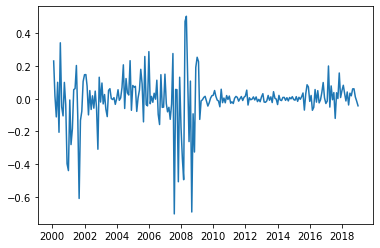

In [104]:
plt.plot(residual_arma[1:])

In [105]:
residual_arma[1:]

DATE
2000-02-01    0.230000
2000-03-01    0.016169
2000-04-01   -0.111014
2000-05-01    0.100022
2000-06-01   -0.204830
                ...   
2018-09-01    0.059886
2018-10-01    0.060458
2018-11-01    0.010594
2018-12-01   -0.014765
2019-01-01   -0.043326
Length: 228, dtype: float64

In [106]:
residual_arch

DATE
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01   -0.133201
2000-05-01    0.123234
                ...   
2018-09-01    0.052352
2018-10-01    0.055647
2018-11-01    0.002619
2018-12-01   -0.018017
2019-01-01   -0.033937
Name: resid, Length: 229, dtype: float64

In [192]:
residual_arch = res.resid

In [193]:
std_resid = (residual_arch/con_vol).dropna()

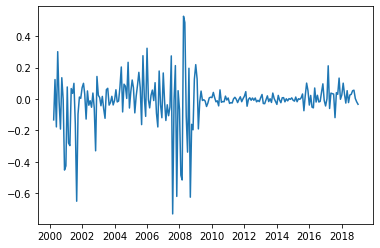

In [107]:
plt.plot(residual_arch)

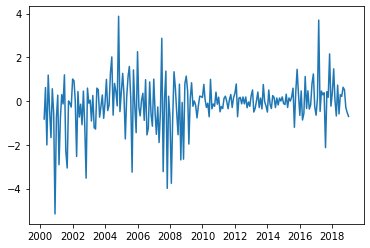

In [194]:
plt.plot(std_resid)

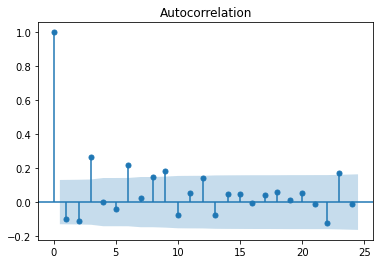

In [195]:
plot_acf(std_resid)
plt.show()

In [184]:
acorr_ljungbox(std_resid)

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 1.68881246,  5.84428762, 18.09013066, 18.58224462, 18.5961405 ,
        24.31086253, 25.20052183, 26.7156105 , 31.15526385, 31.81901316,
        33.35085005, 37.80594181, 37.95013516, 38.19426416, 38.3499813 ,
        38.62133965, 38.85579103, 39.24526347, 39.37116785, 39.55765452,
        39.56108054, 44.35978019, 49.19179447, 49.20004093, 52.50837146,
        52.50991966, 52.56305199, 53.86477565, 53.93161544, 53.96563552,
        54.31472771, 57.0119395 , 59.66688157, 60.1854545 , 62.71939094,
        63.39705596, 64.67849627, 77.88350392, 79.19312088, 79.24458691]),
 array([1.93757588e-01, 5.38181876e-02, 4.21418255e-04, 9.49247781e-04,
        2.28500460e-03, 4.57768245e-04, 6.99119074e-04, 7.91508534e-04,
        2.78412099e-04, 4.29210699e-04, 4.61506710e-04, 1.65188601e-04,
        2.93573787e-04, 4.85253005e-04, 8.00811302e-04, 1.23311546e-03,
        1.87173680e-03, 2.64120731e-03, 3.95378600e-03, 5.67924357e-03,
        8.40524914e-03, 3.19680613e-03, 1.17463095e-03

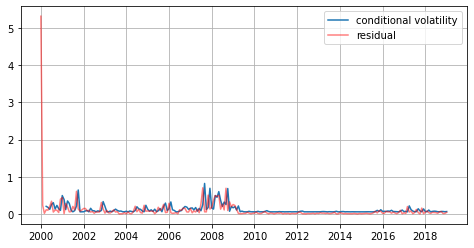

In [198]:
plt.figure(1, figsize=(8,4))
plt.plot(con_vol,label = 'conditional volatility')
plt.plot(abs(residual_arma), color = 'red', alpha = 0.5,label = 'residual')
plt.legend()
plt.grid()
plt.show()

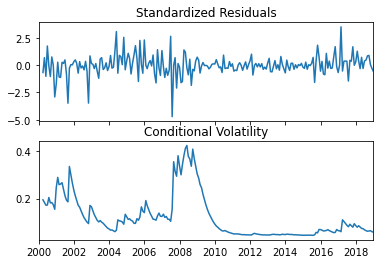

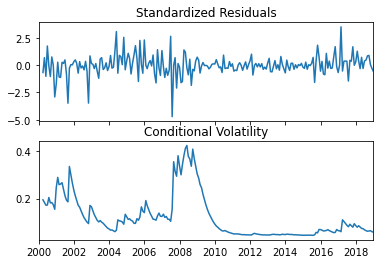

In [117]:
res.plot()

In [180]:
model_arch = ARIMA(residual_arma**2,order=(1,0,1))
resultarch = model_arch.fit()
result.summary()

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  TB3MS   No. Observations:                  229
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 119.567
Date:                Sun, 22 Nov 2020   AIC                           -231.135
Time:                        00:24:35   BIC                           -217.417
Sample:                    01-01-2000   HQIC                          -225.600
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5095      0.035     14.406      0.000       0.440       0.579
ar.L2         -0.0959      0.043     -2.248      0.025      -0.180      -0.012
ar.L3          0.2552      0.043      5.945      0.000       0.171       0.339
sigma2         0.0205      0.001     23.312      0.000       0.019       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               618.16
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -1.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

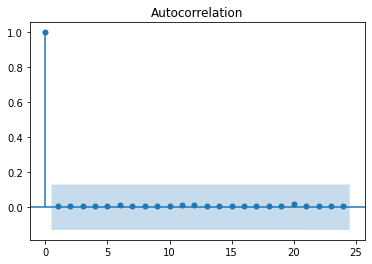

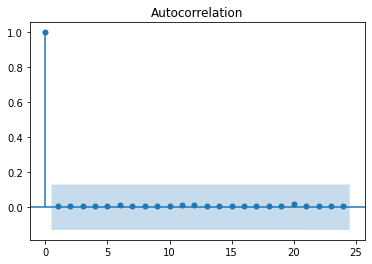

In [181]:
plot_acf(resultarch.resid)

In [225]:
arx = ARX(data, lags=3,rescale = False)
arx.volatility = GARCH(1,0,1)
res = arx.fit(update_freq=0)
print(res.summary())
residual_arch = res.resid
con_vol = res.conditional_volatility
std_resid = (residual_arch/con_vol).dropna()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -218.47055361941594
            Iterations: 12
            Function evaluations: 99
            Gradient evaluations: 8
                           AR - GARCH Model Results                           
Dep. Variable:                  TB3MS   R-squared:                       0.993
Mean Model:                        AR   Adj. R-squared:                  0.993
Vol Model:                      GARCH   Log-Likelihood:                218.471
Distribution:                  Normal   AIC:                          -422.941
Method:            Maximum Likelihood   BIC:                          -398.997
                                        No. Observations:                  226
Date:                Sun, Nov 22 2020   Df Residuals:                      219
Time:                        00:38:29   Df Model:                            7
                                  Mean Model                                 
 

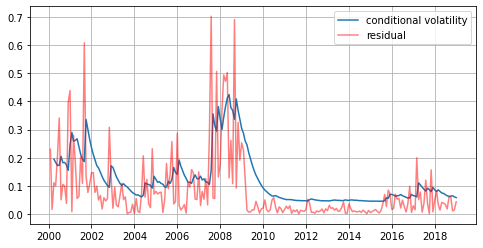

In [233]:
plt.figure(1, figsize=(8,4))
plt.plot(con_vol,label = 'conditional volatility')
plt.plot(abs(residual_arma[1:]), color = 'red', alpha = 0.5,label = 'residual')
plt.legend()
plt.grid()
plt.show()

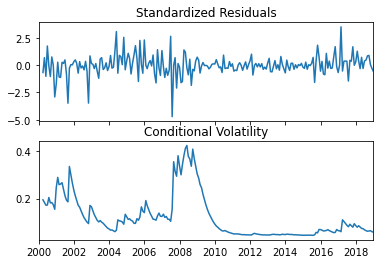

In [227]:
res.plot()
plt.show()

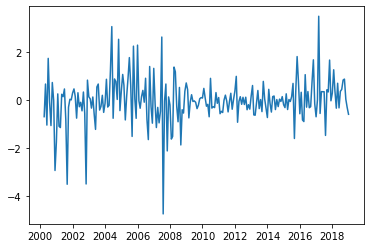

In [228]:
plt.plot(std_resid)

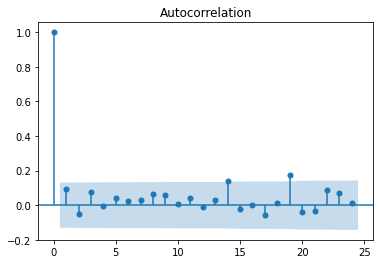

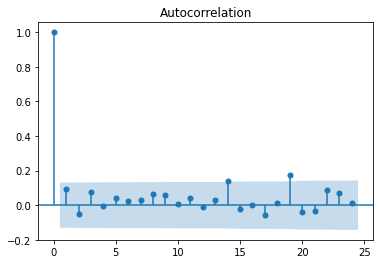

In [232]:
plot_acf(std_resid**2)

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


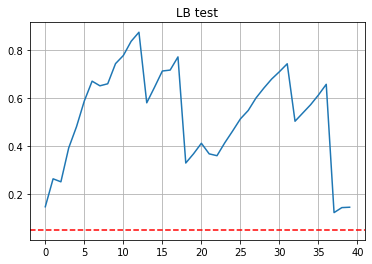

In [236]:

ljbox_test = acorr_ljungbox(std_resid**2)#package version

plt.plot(ljbox_test[1])
plt.axhline(y=0.05, color='r',ls='--')
plt.title("LB test")
plt.grid()
plt.show()

In [244]:
import scipy.stats as stats
import statsmodels.api as sm

c:\users\xuais\anaconda3\envs\snakes\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [245]:
def plot_diagnosticsTight3(data):

    fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(10,10))
    
    ax1.hist(data, bins =40,color='m', density = True)  
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Resid")
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Resid")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
    #logData = np.floor(np.log(len(data)))
    ljbox_test = acorr_ljungbox(data,10)#package version
    
    ax4.plot(ljbox_test[1])
    ax4.axhline(y=0.05, color='r',ls='--')
    ax4.set_title("LB test")
    ax4.grid()
    
    fig = sm.qqplot(data, line='q', ax = ax5)
    ax5.grid()
    
    ax6.plot(data*data)
    ax6.grid()
    ax6.set_title("Resid Sqr")
    
    plt.tight_layout()

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


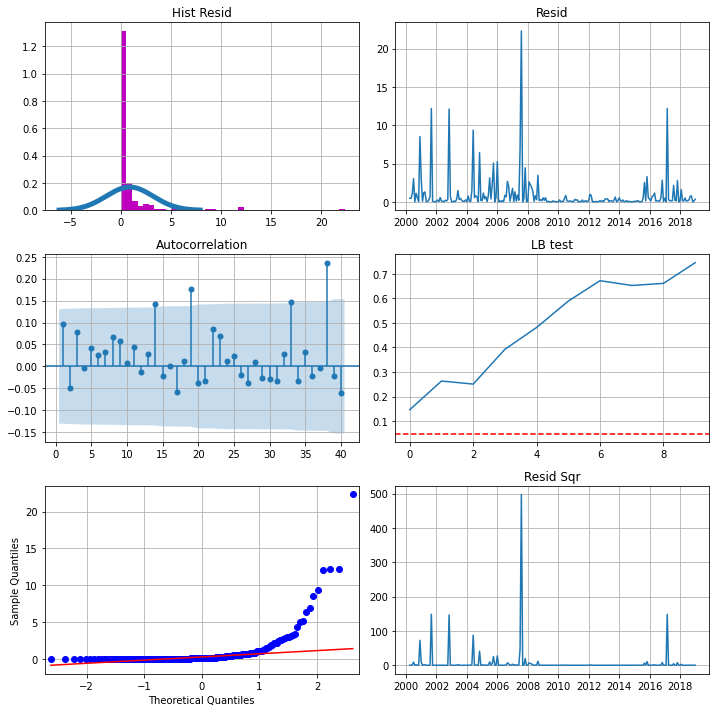

In [246]:
plot_diagnosticsTight3(std_resid**2)